In [2]:
##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from itertools import accumulate
from iaml01cw2_helpers import *

plt.rcParams['figure.figsize'] = [14, 8]

%run iaml01cw2_my_helpers.ipynb

/home/stas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [5]:
# Q2.1
def print_sc_and_confmat(score, conf_mat):
    print(format(score*100, '.2f'))
    print("& " + " & ".join([str(i) for i in range(10)]) + "\\\\ \\hline")
    print(" \\\\ \\hline \n".join([str(i) + " & " + " & ".join([str(conf_mat[i,j]) for j in range(10)]) for i in range(10)]))

In [6]:
def iaml01cw2_q2_1():
    regr = LogisticRegression()
    regr.fit(Xtrn_nm, Ytrn)
    Ytst_pred = regr.predict(Xtst_nm)
    conf_mat = confusion_matrix(Ytst, Ytst_pred)
    score = accuracy_score(Ytst, Ytst_pred)
    print_sc_and_confmat(score, conf_mat)
    return regr
regr = iaml01cw2_q2_1()

84.01
& 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9\\ \hline
0 & 819 & 3 & 15 & 50 & 7 & 4 & 89 & 1 & 12 & 0 \\ \hline 
1 & 5 & 953 & 4 & 27 & 5 & 0 & 3 & 1 & 2 & 0 \\ \hline 
2 & 27 & 4 & 731 & 11 & 133 & 0 & 82 & 2 & 9 & 1 \\ \hline 
3 & 31 & 15 & 14 & 866 & 33 & 0 & 37 & 0 & 4 & 0 \\ \hline 
4 & 0 & 3 & 115 & 38 & 760 & 2 & 72 & 0 & 10 & 0 \\ \hline 
5 & 2 & 0 & 0 & 1 & 0 & 911 & 0 & 56 & 10 & 20 \\ \hline 
6 & 147 & 3 & 128 & 46 & 108 & 0 & 539 & 0 & 28 & 1 \\ \hline 
7 & 0 & 0 & 0 & 0 & 0 & 32 & 0 & 936 & 1 & 31 \\ \hline 
8 & 7 & 1 & 6 & 11 & 3 & 7 & 15 & 5 & 945 & 0 \\ \hline 
9 & 0 & 0 & 0 & 1 & 0 & 15 & 1 & 42 & 0 & 941


In [7]:
# Q2.2
def iaml01cw2_q2_2():
    svc = SVC()
    svc.fit(Xtrn_nm, Ytrn)
    Ytst_pred = svc.predict(Xtst_nm)
    conf_mat = confusion_matrix(Ytst, Ytst_pred)
    score = accuracy_score(Ytst, Ytst_pred)
    print_sc_and_confmat(score, conf_mat)
    return svc
svc = iaml01cw2_q2_2()

84.61
& 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9\\ \hline
0 & 845 & 2 & 8 & 51 & 4 & 4 & 72 & 0 & 14 & 0 \\ \hline 
1 & 4 & 951 & 7 & 31 & 5 & 0 & 1 & 0 & 1 & 0 \\ \hline 
2 & 15 & 2 & 748 & 11 & 137 & 0 & 79 & 0 & 8 & 0 \\ \hline 
3 & 32 & 6 & 12 & 881 & 26 & 0 & 40 & 0 & 3 & 0 \\ \hline 
4 & 1 & 0 & 98 & 36 & 775 & 0 & 86 & 0 & 4 & 0 \\ \hline 
5 & 0 & 0 & 0 & 1 & 0 & 914 & 0 & 57 & 2 & 26 \\ \hline 
6 & 185 & 1 & 122 & 39 & 95 & 0 & 533 & 0 & 25 & 0 \\ \hline 
7 & 0 & 0 & 0 & 0 & 0 & 34 & 0 & 925 & 0 & 41 \\ \hline 
8 & 3 & 1 & 8 & 5 & 2 & 4 & 13 & 4 & 959 & 1 \\ \hline 
9 & 0 & 0 & 0 & 0 & 0 & 22 & 0 & 47 & 1 & 930


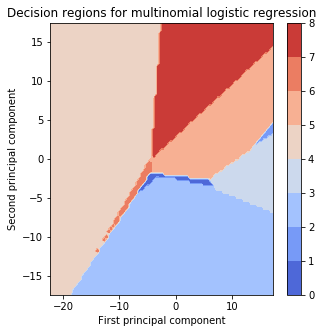

In [29]:
# Q2.3

def genContours(predictor):
    plt.figure(figsize=(5,5))
    pca = PCA(n_components=2)
    Xtrn_proj = pca.fit_transform(Xtrn_nm, Ytrn)
    variances = pca.explained_variance_
    stddevs = np.sqrt(variances)
    xsp = np.linspace(-5*stddevs[0], 5*stddevs[1], 100)
    ysp = np.linspace(-5*stddevs[1], 5*stddevs[1], 100)
    X,Y = np.meshgrid(xsp, ysp)
    XY = np.column_stack((X.reshape((10000,1)),Y.reshape((10000,1))))
    PT = pca.inverse_transform(XY)
    Z = predictor(PT)
    Z = Z.reshape(100,100)
    
    plt.contourf(X, Y, Z, cmap="coolwarm")
    plt.colorbar(spacing='uniform')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

def iaml01cw2_q2_3():
    genContours(lambda pt: regr.predict(pt))
    plt.title('Decision regions for multinomial logistic regression')
    plt.savefig('imgs/2_3.png', bbox_inches = 'tight', pad_inches = 0.2)
    
iaml01cw2_q2_3()

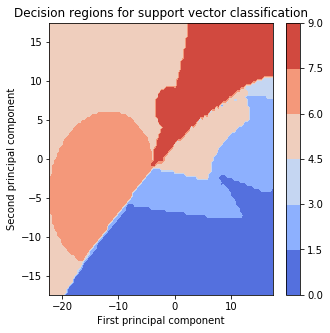

In [28]:
# Q2.4
def iaml01cw2_q2_4():
    genContours(lambda pt: svc.predict(pt))
    plt.title('Decision regions for support vector classification')
    plt.savefig('imgs/2_4.png', bbox_inches = 'tight', pad_inches = 0.4)
iaml01cw2_q2_4()

0.8565023106939273 21.544346900318846


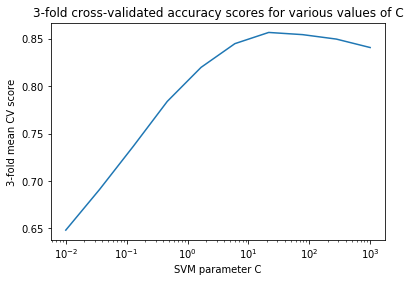

In [5]:
# Q2.5
def iaml01cw2_q2_5():
    small_size = 1000 # testing
    Xsmall = np.concatenate([Xtrn_nm[Ytrn==i][:small_size] for i in range(10)], axis=0)
    Ysmall = np.concatenate([Ytrn[Ytrn==i][:small_size] for i in range(10)], axis=0)
    Cs = 10**np.linspace(-2,3,10)
    ScoreByC = []
    for C in Cs:
        svm_mdl = SVC(kernel='rbf', C=C)
        scores = cross_val_score(svm_mdl, Xsmall, Ysmall, cv=3)
        score = scores.mean()
        ScoreByC.append(score)
        
    plt.plot(Cs, ScoreByC)
    plt.xscale('log')
    plt.xlabel('SVM parameter C')
    plt.ylabel('3-fold mean CV score')
    plt.title('3-fold cross-validated accuracy scores for various values of C')
    bestScore, bestC = max(zip(ScoreByC, Cs))
    print(bestScore, bestC)
    plt.savefig('imgs/2_5.png', bbox_inches = 'tight', pad_inches = 0.4)
    return bestC
bestC = iaml01cw2_q2_5()  


In [8]:
# Q2.6 
def iaml01cw2_q2_6():
    svm_mdl = SVC(kernel='rbf', C=bestC)
    svm_mdl.fit(Xtrn_nm, Ytrn)
    Ytrn_pred = svm_mdl.predict(Xtrn_nm)
    trn_accu = (Ytrn == Ytrn_pred).mean()
    
    Ytst_pred = svm_mdl.predict(Xtst_nm)
    tst_accu = (Ytst == Ytst_pred).mean()
    
    print("train accu: ", format(trn_accu*100, '.2f'), " tst_accu", format(tst_accu*100, '.2f'))
    
    
iaml01cw2_q2_6()

train accu:  90.84  tst_accu 87.65
